In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
labelFilePath = "C:/Users/dieck/desktop/labels_test.txt" #Input file path
labelFile = open(labelFilePath, 'r').readlines()

labelsColumns = ['image name', 'sex', 'orientation', 'optic disk upper left', 'optic disk lower right', 
                 'optic disk ul x', 'optic disk ul y', 'optic disk lr x', 'optic disk lr y', 
                 'fovea upper left', 'fovea lower right', 
                 'fovea ul x', 'fovea ul y','fovea lr x', 'fovea lr y',
                 'optic disk area estimate', 'fovea area estimate',
                 'distance','labeler']

len(labelFile)

2858

In [3]:
path = labelFile[0].split(':')[1].strip()
labeler = labelFile[1].split(':')[1].strip()

path, labeler, len(labelFile)

('/home/yeung/workspace/data/raw/train/', 'Simon', 2858)

In [6]:
labelsRows = []

for line in labelFile:
    tokens = line.split(':')
    if(tokens[0] not in ['Origin Folder',' Labeled by'] and tokens[1] != ' Interrupted at line'):
        
        odul = np.nan
        odulX = np.nan
        odulY = np.nan
        
        odlr = np.nan
        odlrX = np.nan
        odlrY = np.nan
        
        odArea = np.nan
        
        ful = np.nan
        fulX = np.nan
        fulY = np.nan
        
        flr = np.nan
        flrX = np.nan
        flrY = np.nan
        
        fArea = np.nan
        
        distance = np.nan
        
        p = tokens[0].split('/')[1]
        
        ori = ""
        
        if(p.split('_')[1] == '21015'):
            ori = "Left"
        else:
            ori = "Right"
        
        sex = tokens[0].split('/')[0]
        
        if(len(tokens) > 2 and len(tokens[2]) > 5):
            if(tokens[2][-1] == 'a'):
                coord = tokens[2][:-6].split(',')
            else:
                coord = tokens[2][:-1].split(',')
            
            odulX = int(coord[0].strip()[1:])
            odulY = int(coord[1].strip()[:-1])
            odul = (odulX, odulY)
            
            odlrX = int(coord[2].strip()[1:])
            odlrY = int(coord[3].strip()[:-1])
            odlr = (odlrX, odlrY)
            
            odArea = (int) (3* (odlrX - odulX)/2 * (odlrY - odulY)/2)
            
        if(len(tokens) == 4):
            coord = tokens[3].split(',')
            
            fulX = int(coord[0].strip()[1:])
            fulY = int(coord[1].strip()[:-1])
            ful = (fulX, fulY)
        
            flrX = int(coord[2].strip()[1:])
            flrY = int(coord[3].strip()[:-1])
            flr = (flrX, flrY)
            
            fArea = (int) (3* (flrX - fulX)/2 * (flrY - fulY)/2)
            
            centerOd = np.array( ( (odulX + ((odlrX - odulX)/2)) , (odulY + ((odlrY - odulY)/2)) ) )
            centerf  = np.array( ( (fulX + ((flrX - fulX)/2)) , (fulY + ((flrY - fulY)/2)) ) )
            
            distance = np.linalg.norm(centerOd - centerf)
        
        labelsRows.append((p, sex, ori, odul, odlr, odulX, odulY, odlrX, odlrY, 
                           ful, flr, fulX, fulY, flrX, flrY, odArea, fArea,
                           distance, labeler))

In [7]:
df = pd.DataFrame.from_records(labelsRows, columns=labelsColumns)

df.head(10)

,image name,sex,orientation,optic disk upper left,optic disk lower right,optic disk ul x,optic disk ul y,optic disk lr x,optic disk lr y,fovea upper left,fovea lower right,fovea ul x,fovea ul y,fovea lr x,fovea lr y,optic disk area estimate,fovea area estimate,distance,labeler
0,5333675_21016_0_0.png,male,Right,"(1369, 672)","(1552, 856)",1369.0,672.0,1552.0,856.0,"(999, 759)","(1056, 807)",999.0,759.0,1056.0,807.0,25254.0,2052.0,433.416659,Simon
1,3931632_21016_1_0.png,female,Right,"(1456, 637)","(1637, 844)",1456.0,637.0,1637.0,844.0,"(1010, 749)","(1069, 801)",1010.0,749.0,1069.0,801.0,28100.0,2301.0,508.172461,Simon
2,4189850_21015_0_0.png,female,Left,"(399, 641)","(580, 841)",399.0,641.0,580.0,841.0,"(992, 743)","(1040, 790)",992.0,743.0,1040.0,790.0,27150.0,1692.0,527.117160,Simon
3,3533051_21015_1_0.png,male,Left,"(495, 540)","(680, 729)",495.0,540.0,680.0,729.0,"(1022, 732)","(1084, 787)",1022.0,732.0,1084.0,787.0,26223.0,2557.0,481.990923,Simon
4,1054396_21015_0_0.png,male,Left,"(429, 617)","(629, 826)",429.0,617.0,629.0,826.0,"(1048, 760)","(1105, 813)",1048.0,760.0,1105.0,813.0,31350.0,2265.0,551.344946,Simon
5,2675332_21016_0_0.png,male,Right,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Simon
6,4793908_21015_0_0.png,female,Left,"(391, 626)","(609, 848)",391.0,626.0,609.0,848.0,"(986, 765)","(1041, 815)",986.0,765.0,1041.0,815.0,36297.0,2062.0,516.227905,Simon
7,1468683_21016_1_0.png,female,Right,"(1473, 667)","(1630, 861)",1473.0,667.0,1630.0,861.0,NaN,NaN,NaN,NaN,NaN,NaN,22843.0,NaN,NaN,Simon
8,1259523_21016_0_0.png,male,Right,"(1438, 560)","(1631, 787)",1438.0,560.0,1631.0,787.0,"(994, 779)","(1045, 824)",994.0,779.0,1045.0,824.0,32858.0,1721.0,530.668446,Simon
9,2769018_21015_0_0.png,female,Left,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Simon


In [8]:
from sklearn.decomposition import PCA

In [9]:
X_long = df[['sex','orientation','optic disk ul x', 'optic disk ul y', 'optic disk lr x', 'optic disk lr y',
        'fovea ul x', 'fovea ul y', 'fovea lr x', 'fovea lr y','optic disk area estimate','fovea area estimate']]

X = ((X_long.dropna()).reset_index()).drop(['index'], axis=1)

X_Left = ((X.loc[X['orientation'] == 'Left']).reset_index()).drop(['index'], axis=1)

X_Right = ((X.loc[X['orientation'] == 'Right']).reset_index()).drop(['index'], axis=1)

X.head()

,sex,orientation,optic disk ul x,optic disk ul y,optic disk lr x,optic disk lr y,fovea ul x,fovea ul y,fovea lr x,fovea lr y,optic disk area estimate,fovea area estimate
0,male,Right,1369.0,672.0,1552.0,856.0,999.0,759.0,1056.0,807.0,25254.0,2052.0
1,female,Right,1456.0,637.0,1637.0,844.0,1010.0,749.0,1069.0,801.0,28100.0,2301.0
2,female,Left,399.0,641.0,580.0,841.0,992.0,743.0,1040.0,790.0,27150.0,1692.0
3,male,Left,495.0,540.0,680.0,729.0,1022.0,732.0,1084.0,787.0,26223.0,2557.0
4,male,Left,429.0,617.0,629.0,826.0,1048.0,760.0,1105.0,813.0,31350.0,2265.0


In [10]:
pca = PCA(n_components=2)
pca.fit(X_Right.drop(['sex','orientation'], axis=1))

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [11]:
pca.explained_variance_ratio_

array([0.96974649, 0.02969733])

In [12]:
P_array = pca.transform(X_Right.drop(['sex','orientation'], axis=1))

P_df = pd.DataFrame(P_array, columns=['component0', 'component1'])

P = P_df.join(X_Right[['sex','orientation']])

P.head()

,component0,component1,sex,orientation
0,-4592.020193,-367.749110,male,Right
1,-1737.792047,-244.125059,female,Right
2,2990.002979,-1033.794162,male,Right
3,-806.519495,-871.361020,male,Right
4,2289.163835,-1467.233148,male,Right


In [13]:
import seaborn as sns

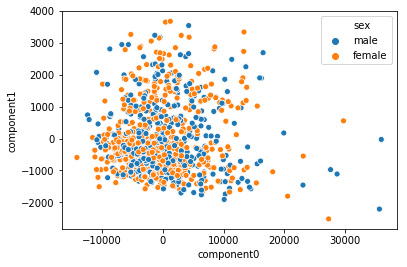

In [14]:
ax = sns.scatterplot(x="component0", y="component1", hue="sex", data=P)

In [15]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [16]:
LDA_X_Right = X_Right.drop(['sex', 'orientation'], axis=1)
y_Right = X_Right[['sex']].values.ravel()

LDA_X_Left = X_Left.drop(['sex', 'orientation'], axis=1)
y_Left = X_Left[['sex']].values.ravel()

In [17]:
lda = LinearDiscriminantAnalysis()

lda.fit(LDA_X_Right, y_Right)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [18]:
LD = lda.transform(LDA_X_Right)

LDL = lda.fit_transform(LDA_X_Left, y_Left)

LDL = pd.DataFrame(LDL, columns=['LDA_component']).join(X_Left[['sex','orientation']])

LD = pd.DataFrame(LD, columns=['LDA_component']).join(X_Right[['sex','orientation']])

LD = LD.append(LDL)

LD.head(10)

,LDA_component,sex,orientation
0,0.466785,male,Right
1,-0.442036,female,Right
2,-1.214763,male,Right
3,-0.502089,male,Right
4,-1.241210,male,Right
5,-0.496424,male,Right
6,-0.911120,female,Right
7,-1.074647,male,Right
8,-0.824434,female,Right
9,0.173834,female,Right


C:\Users\dieck\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


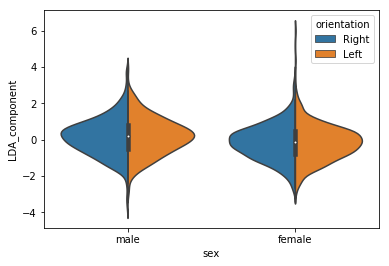

In [19]:
axv = sns.violinplot(x='sex', y='LDA_component', hue='orientation', data=LD, split=True)

In [21]:
df_dist = df[['sex','distance','orientation']]
df_dist = ((df_dist.dropna()).reset_index()).drop(['index'], axis=1)

df_dist.head(10)

,sex,distance,orientation
0,male,433.416659,Right
1,female,508.172461,Right
2,female,527.117160,Left
3,male,481.990923,Left
4,male,551.344946,Left
5,female,516.227905,Left
6,male,530.668446,Right
7,male,518.900039,Left
8,female,467.184118,Left
9,female,489.184270,Left


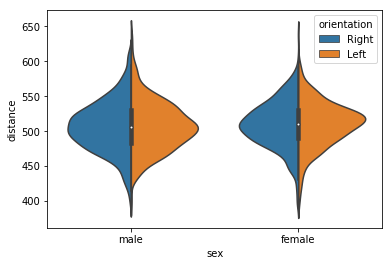

In [23]:
axv = sns.violinplot(x='sex', y='distance', hue='orientation', data=df_dist, split=True)